In [1]:
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view
from pymatgen import MPRester
from pprint import pprint
from pymatgen.electronic_structure.plotter import BSPlotter


In [2]:
with MPRester("6D8NXvBA170Om5w3") as m:
    bs = m.get_bandstructure_by_material_id("mp-2530")
    dos = m.get_dos_by_material_id("mp-2530")

In [29]:
#bande interdite
B=bs.get_band_gap()
print('Energie de la bande interdite', B. get("energy"))
print('Bande interdite :', B. get("direct"), ', La bande interdite est indirecte')

Energie de la bande interdite 2.4914
Bande interdite : False , La bande interdite est indirecte


In [4]:
data = m.query(criteria={"task_id": {"$in": ["mp-2530"]}}, properties=["band_gap"])
print(data) 

[{'band_gap': 2.5171000000000006}]


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

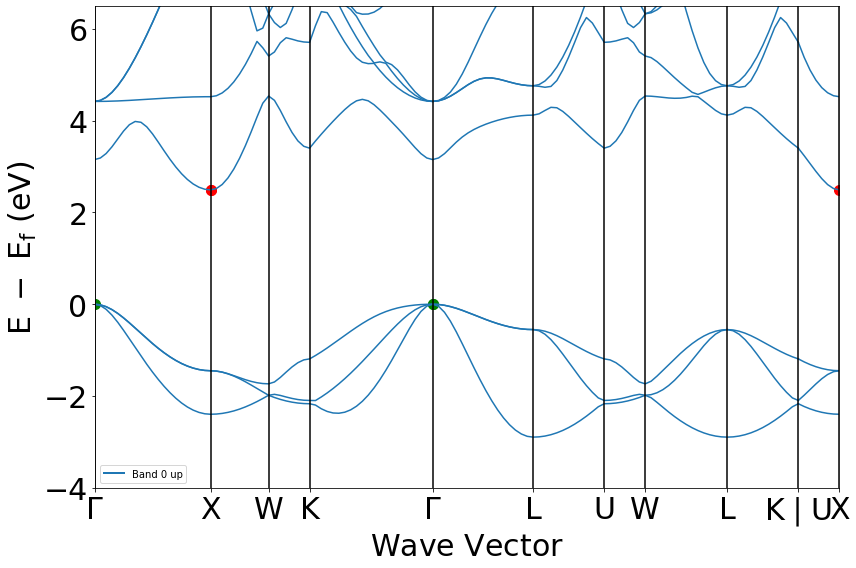

In [45]:
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter
%matplotlib inline
cs = BSPlotter(bs)
cs.get_plot(bs, vbm_cbm_marker=True)
#cs.show(bs)

#la bande présente le moins de dispersion quand elle dépen peu de k -> quand la fonction est plane

In [43]:
cb = bs.get_cbm()
print("vecteur k en coordonnées cartésiennes :",cbm['kpoint'].cart_coords)
print("Energie minimale de la bande de conduction = ", cbm["energy"])

vecteur k en coordonnées cartésiennes : [ 0.         -0.96449352  0.        ]
Energie minimale de la bande de conduction =  4.6498


In [44]:
vbm = bs.get_vbm()
print("vecteur k en coordonnées cartésiennes :",vbm['kpoint'].cart_coords)
print("Energie maximale de la bande de valence = ", vbm["energy"])

vecteur k en coordonnées cartésiennes : [0. 0. 0.]
Energie maximale de la bande de valence =  2.1584


In [ ]:
#masse effective
#supposons une dispersion parabolioque, nous pouvons donc utiliser la formule suivante pour l'énergie : E(k) = (hbar*k)**2/(2*m_eff)
# <=> m_eff = (hbar*k)**2/(2*E)
